# Indentitas
- Nama: Anastasia Jessica Setyayuningrum
- ID : SI602016
- MSIB BATCH 6

# Sumber Dataset
Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# Latar Belakang

Dataset ini diperoleh dari Kaggle, sebuah platform yang menyediakan berbagai dataset untuk analisis dan penelitian.

Stroke adalah salah satu penyakit yang paling berbahaya dan paling banyak mengakibatkan kehilangan kehidupan. Stroke adalah penyakit yang dapat mengakibatkan kehilangan kemampuan dan kehilangan kehidupan. Stroke adalah penyakit yang dapat mengakibatkan kehilangan kemampuan dan kehilangan kehidupan. Stroke adalah penyakit yang dapat mengakibatkan kehilangan kemampuan dan kehilangan kehidupan.

Dataset "Stroke Prediction" merupakan kumpulan data yang bertujuan untuk memahami dan menganalisis faktor-faktor risiko yang berkaitan dengan kemungkinan seseorang mengalami stroke. Stroke merupakan kondisi medis serius yang dapat menyebabkan kecacatan atau kematian, dan merupakan salah satu penyebab utama kematian di dunia. Untuk mengidentifikasi faktor-faktor risiko yang berkontribusi terhadap risiko stroke dan memahami hubungan antara faktor-faktor tersebut, dataset ini disusun dan dipublikasikan secara publik.

Dataset ini berisi informasi tentang sejumlah atribut atau fitur yang terkait dengan kondisi kesehatan, riwayat medis, gaya hidup, dan karakteristik demografis dari sejumlah individu. Fitur-fitur ini meliputi usia, jenis kelamin, tekanan darah, indeks massa tubuh (BMI), status merokok, konsumsi alkohol, riwayat penyakit jantung, dan lain-lain.

Tujuan dari dataset ini adalah untuk membantu para peneliti, ilmuwan data, dan profesional kesehatan dalam memahami dan menganalisis faktor-faktor risiko yang berkaitan dengan stroke, serta dalam mengembangkan strategi pencegahan, diagnosis, dan pengelolaan yang lebih efektif untuk kondisi ini.

# Atribut atau Kolom dalam Dataset

Dataset ini terdiri dari beberapa kolom yang menyediakan informasi tentang berbagai atribut yang terkait dengan risiko stroke. Beberapa atribut utama dalam dataset ini antara lain:

- id: Nomor identifikasi unik untuk setiap individu.
- gender: Jenis kelamin individu (Male/Female/Other).
- age: Usia individu.
- hypertension: Apakah individu menderita hipertensi (0 = No, 1 = Yes).
- heart_disease: Apakah individu memiliki penyakit jantung (0 = No, 1 = Yes).
- ever_married: Apakah individu pernah menikah (Yes/No).
- work_type: Jenis pekerjaan individu (Private, Self-employed, Govt_job, etc.).
- Residence_type: Jenis tempat tinggal individu (Urban/Rural).
- avg_glucose_level: Tingkat glukosa darah rata-rata individu.
- bmi: Indeks Massa Tubuh (Body Mass Index) individu.
- smoking_status: Status merokok individu (formerly smoked, never smoked, etc.).
- stroke: Apakah individu mengalami stroke (0 = No, 1 = Yes).

# Problem Statement

Masalah kesehatan yang serius di seluruh dunia adalah stroke, yang dapat memiliki konsekuensi yang serius termasuk kematian dan cacat. Oleh karena itu, penting untuk dapat memprediksi risiko stroke pada individu. Dalam konteks ini, dataset ini menyediakan informasi tentang berbagai faktor yang terkait dengan risiko stroke, seperti usia, jenis kelamin, riwayat penyakit, dan gaya hidup. Tujuan utama dari analisis dataset ini adalah untuk mengidentifikasi faktor-faktor risiko yang berpengaruh terhadap kemungkinan seseorang mengalami stroke. Melalui analisis data yang akan dilakukan ada beberapa hal yang ingin dijawab dari pertanyaan-pertanyaan berikut:

1. Apakah distribusi pada data kasus stroke seimbang?
2. Apakah Orang yang terkena hypertensi berpeluang lebih besar terkena stroke dibandingkan dengan yang normal?
3. Bagaimana kualitas model prediksi yang dihasilkan, dan seberapa baik model tersebut dalam memprediksi kejadian stroke berdasarkan data yang tersedia?

Dengan menjawab pertanyaan-pertanyaan ini, diharapkan analisis data pada dataset "Stroke Prediction" dapat memberikan wawasan yang berharga untuk membantu dalam pencegahan, diagnosis, dan pengelolaan penyakit stroke.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Informasi dari output code tersebut adalah sebagai berikut:

1. Dataset terdiri dari 5110 baris dan 12 kolom.
2. Tidak ada nilai yang hilang (NULL) pada kolom-kolom kecuali kolom "bmi" yang memiliki beberapa nilai NULL (jumlah non-null count untuk kolom "bmi" adalah 4909, sementara total baris adalah 5110).
3. Atribut "id" adalah sebuah identifier unik untuk setiap individu, sementara atribut "stroke" adalah target variabel yang akan diprediksi.
4. Beberapa atribut adalah variabel kategorikal (gender, ever_married, work_type, Residence_type, dan smoking_status), sementara yang lain adalah variabel numerik (age, hypertension, heart_disease, avg_glucose_level, dan bmi).
5. Variabel target "stroke" adalah variabel biner dengan nilai 0 untuk tidak mengalami stroke dan nilai 1 untuk mengalami stroke.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


Insight :
1. Usia (age) memiliki rentang antara 0.08 hingga 82 tahun dengan rata-rata usia sekitar 43 tahun. Kuartil pertama (25%) berada pada usia 25 tahun, kuartil kedua (median) berada pada usia 45 tahun, dan kuartil ketiga (75%) berada pada usia 61 tahun.
2. Sekitar 9.75% dari individu dalam dataset menderita hipertensi (hypertension), dan sekitar 5.4% memiliki penyakit jantung (heart_disease).
3. Rata-rata tingkat glukosa darah rata-rata (avg_glucose_level) adalah sekitar 106.15 dengan standar deviasi sebesar 45.28. Nilai minimum adalah 55.12 dan nilai maksimum adalah 271.74.
4. Indeks Massa Tubuh (bmi) memiliki rata-rata sekitar 28.89 dengan standar deviasi sebesar 7.85. Nilai minimum adalah 10.3 dan nilai maksimum adalah 97.6.
5. Prevalensi stroke dalam dataset cukup rendah, dengan hanya sekitar 4.87% dari individu yang mengalami stroke.

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
(df.isnull().sum()/df.shape[0]) * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Diketahui bahwa kolom `BMI` memiliki 201 baris atau 3.93% nilai kosong dari keseluruhan baris, sedangkan kolom lainnya tidak memiliki nilai kosong.

In [9]:
df.drop("id", axis = 1, inplace=True)

In [10]:
df.drop(df[df['age'] < 1].index, inplace=True)

Mendrop data pada atribut age yang umurnya kurang dari 1 tahun

In [11]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [12]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [13]:
df["avg_glucose_level"].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [14]:
df.dropna(subset=['bmi'], inplace=True)

Menghapus baris dengan nilai NULL pada kolom "bmi"

Mengganti nilai NULL pada kolom "bmi" dengan nilai rata-rata

# EDA (Exploratory Data Analysis)

In [15]:
categorical_feature= df.columns[df.dtypes=='object'].tolist()
print(categorical_feature)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


Daftar nama kolom yang memiliki tipe data 'object' mencakup kolom 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'. Hal ini untuk memahami distribusi dan karakteristik dari variabel kategorikal dalam dataset.

In [16]:
numerical_feature= df.select_dtypes(include='number').columns.tolist()
print(numerical_feature)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


Daftar nama kolom yang memiliki tipe data numerik dalam Data Frame, mencakup kolom 'id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'. Hal ini untuk memahami distribusi, korelasi, dan pola yang berkaitan dengan variabel numerik dalam dataset.

In [17]:
numerical_feature = ['age','avg_glucose_level', 'bmi']

Variabel ini berisi daftar nama kolom yang berisi fitur-fitur numerik dalam dataset yaitu 'age', 'avg_glucose_level', dan 'bmi'. 

In [18]:
cat_enc_feature= ['hypertension', 'heart_disease']
target= ['stroke']

Variabel ini berisi daftar nama kolom yang berisi fitur-fitur kategorikal yang sudah dienkoding yaitu  fitur 'hypertension' dan 'heart_disease' dengan target dari analisis data yang ingin diprediksi adalah kolom 'stroke'

In [19]:
df[numerical_feature].describe()

,age,avg_glucose_level,bmi
count,4867.000000,4867.000000,4867.000000
mean,43.230812,105.388847,28.985720
std,22.304969,44.534097,7.817091
min,1.000000,55.120000,10.300000
25%,25.000000,77.080000,23.700000
50%,45.000000,91.680000,28.100000
75%,60.500000,113.600000,33.100000
max,82.000000,271.740000,97.600000


Berdasarkan hasil output tersebut dapat diketahui :
1. Usia (Age):
    - Rata-rata usia responden adalah sekitar 43 tahun dengan standar deviasi sekitar 22 tahun, menunjukkan variasi yang cukup besar dalam usia.
    - Usia termuda yang tercatat adalah 1 tahun, sementara usia tertua adalah 82 tahun.
    - Mayoritas individu berada pada rentang usia 25 hingga 60 tahun, dengan nilai median (50%) sekitar 45 tahun.
2. Kadar Glukosa Rata-Rata (Average Glucose Level):
    - Rata-rata tingkat glukosa darah rata-rata adalah sekitar 105.39 mg/dL, dengan rentang antara 55.12 hingga 271.74 mg/dL.
    - Sebagian besar individu memiliki tingkat glukosa darah rata-rata di bawah 113.6 mg/dL, dengan nilai median (50%) sekitar 91.68 mg/dL.
3. Indeks Massa Tubuh (Body Mass Index/BMI):
    - Rata-rata indeks massa tubuh (BMI) individu adalah sekitar 28.99 kg/m^2, dengan rentang antara 10.3 hingga 97.6 kg/m^2.
    - Sebagian besar individu memiliki BMI di kisaran 23.7 hingga 33.1 kg/m^2, dengan nilai median (50%) sekitar 28.1 kg/m^2.
    
insight:
- Kebanyakan pasiennya berumur pada kisaran 45 tahun.
- Jelaskan asumsi distribusi datanya, apakah simetris (normal) atau tidak simetris ?. Untuk menentukan apakah distribusi data simetris (normal) atau tidak simetris, kita perlu memperhatikan nilai-nilai statistik tertentu seperti mean, median, dan standar deviasi. Untuk mengetahui secara pasti, kita perlu melakukan visualisasi data dan analisis statistik lanjutan seperti uji normalitas. 

In [20]:
df[categorical_feature].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4867,4867,4867,4867,4867
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2882,3204,2811,2468,1852


- Jenis kelamin yang paling umum adalah "Female"
- Sebagian besar responden pernah menikah ("Yes")
- Sebagian besar bekerja di sektor swasta ("Private")
- Tinggal di daerah perkotaan ("Urban")
- Sebagian besar tidak pernah merokok ("never smoked").

# 1. Apakah distribusi pada data kasus stroke seimbang?

In [21]:
stroke_dist=df['stroke'].value_counts(normalize=True)
stroke_dist.values

array([0.95705774, 0.04294226])

Output yang diberikan, yaitu [0.95705774, 0.04294226], menunjukkan bahwa:
- Sekitar 95.7% dari data memiliki nilai 'stroke' yang sama dengan 0 (tidak mengalami stroke).
- Sekitar 4.3% dari data memiliki nilai 'stroke' yang sama dengan 1 (mengalami stroke).

Dari proporsi ini, kita dapat menyimpulkan bahwa distribusi kategori pada variabel target 'stroke' tidak seimbang, karena signifikan lebih besar dari kategori '0' (tidak mengalami stroke) dibandingkan dengan kategori '1' (mengalami stroke).

In [22]:
stroke_dist.keys()

Index([0, 1], dtype='int64', name='stroke')

Variabel target 'stroke' dalam dataset hanya memiliki dua kategori atau nilai, yaitu 0 dan 1, yang mungkin mewakili apakah seseorang mengalami stroke atau tidak.

In [23]:
# Data
labels = ['No Stroke', 'Stroke']
sizes = [95.7, 4.29]  # Persentase distribusi
colors = ['lightskyblue', 'lightcoral']

# Plot pie chart
fig = px.pie(labels=labels, values=sizes, title='Population of European continent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Output yang dihasilkan adalah sebuah pie chart yang memperlihatkan proporsi dari setiap kategori dalam variabel target 'stroke'. Berdasarkan output tersebut:
- Bagian yang direpresentasikan oleh kategori 0 (tidak mengalami stroke) memiliki proporsi sebesar 95.7% dari total.
- Bagian yang direpresentasikan oleh kategori 1 (mengalami stroke) memiliki proporsi sebesar 4.29% dari total.

Dapat disimpulkan bahwa distribusi pada data kasus stroke tidak seimbang, karena proporsi antara kategori 0 dan 1 sangat berbeda jauh.

In [ ]:
hypertension_dist=df[cat_enc_feature[0]].value_counts(normalize=True)
hypertension_dist

hypertension
0    0.907335
1    0.092665
Name: proportion, dtype: float64

Dari hasil yang diperoleh, terlihat distribusi dari variabel "hypertension" proporsi dari masing-masing kategori, yaitu sebagai berikut :
- Sekitar 90.73% dari data memiliki nilai "0" (tidak menderita hipertensi).
- Sekitar 9.27% dari data memiliki nilai "1" (menderita hipertensi).

Dengan proporsi yang signifikan lebih tinggi untuk kategori "0" (tidak menderita hipertensi) dibandingkan dengan kategori "1" (menderita hipertensi), distribusi pada data hipertensi juga terlihat tidak seimbang.

In [ ]:
hd_dist=df[cat_enc_feature[1]].value_counts(normalize=True)
hd_dist

heart_disease
0    0.950072
1    0.049928
Name: proportion, dtype: float64

- Sekitar 95% dari data memiliki nilai 'heart_disease' yang sama dengan 0 (tidak memiliki penyakit jantung).
- Sekitar 5% dari data memiliki nilai 'heart_disease' yang sama dengan 1 (memiliki penyakit jantung).

Dapat disimpulkan bahwa distribusi pada variabel yang terkait dengan penyakit jantung (heart_disease) dalam dataset tidak seimbang. Proporsi yang signifikan lebih besar dari kategori '0' (tidak memiliki penyakit jantung) dibandingkan dengan kategori '1' (memiliki penyakit jantung).

# Apakah Orang yang terkena hypertensi berpeluang lebih besar terkena stroke dibandingkan dengan yang normal?

In [ ]:
df.groupby(['hypertension','stroke']).size().unstack()

stroke,0,1
hypertension,,
0,4267,149
1,391,60


Dari output ini, kita dapat melihat bahwa:
- Untuk individu yang tidak menderita hipertensi (hypertension=0):
    - Terdapat 4267 individu yang tidak mengalami stroke (stroke=0).
    - Terdapat 149 individu yang mengalami stroke (stroke=1).
- Untuk individu yang menderita hipertensi (hypertension=1):
    - Terdapat 391 individu yang tidak mengalami stroke (stroke=0).
    - Terdapat 60 individu yang mengalami stroke (stroke=1).

Dari data tersebut, terlihat bahwa proporsi individu yang mengalami stroke lebih tinggi di antara mereka yang menderita hipertensi (sekitar 13.31%) dibandingkan dengan mereka yang tidak menderita hipertensi (sekitar 3.38%).

In [ ]:
pd.crosstab(df['hypertension'], df['stroke'], normalize='index')

stroke,0,1
hypertension,,
0,0.966259,0.033741
1,0.866962,0.133038


Dari output ini, kita dapat melihat bahwa:
- Untuk individu yang tidak menderita hipertensi (hypertension=0):
    - Sekitar 96.63% tidak mengalami stroke (stroke=0).
    - Sekitar 3.37% mengalami stroke (stroke=1).
- Untuk individu yang menderita hipertensi (hypertension=1):
    - Sekitar 86.70% tidak mengalami stroke (stroke=0).
    - Sekitar 13.30% mengalami stroke (stroke=1).

Output tersebut menunjukkan bahwa proporsi individu yang mengalami stroke lebih tinggi di antara mereka yang menderita hipertensi. Hal ini menambah konfirmasi terhadap observasi sebelumnya, bahwa orang yang menderita hipertensi memiliki peluang yang lebih tinggi untuk mengalami stroke dibandingkan dengan yang tidak menderita hipertensi.

In [ ]:
pd.crosstab(df['heart_disease'], df['stroke'], normalize='index')

stroke,0,1
heart_disease,,
0,0.963452,0.036548
1,0.835391,0.164609


Dari output ini, kita dapat melihat bahwa:
- Untuk individu yang tidak memiliki penyakit jantung (heart_disease=0):
    - Sekitar 96.35% tidak mengalami stroke (stroke=0).
    - Sekitar 3.65% mengalami stroke (stroke=1).
- Untuk individu yang memiliki penyakit jantung (heart_disease=1):
    - Sekitar 83.54% tidak mengalami stroke (stroke=0).
    - Sekitar 16.46% mengalami stroke (stroke=1).

Hasil ini menunjukkan bahwa individu yang memiliki penyakit jantung memiliki peluang yang lebih tinggi untuk mengalami stroke dibandingkan dengan mereka yang tidak memiliki penyakit jantung. Hal ini kembali menegaskan pentingnya faktor risiko seperti hipertensi dan penyakit jantung dalam mempengaruhi kemungkinan seseorang mengalami stroke.

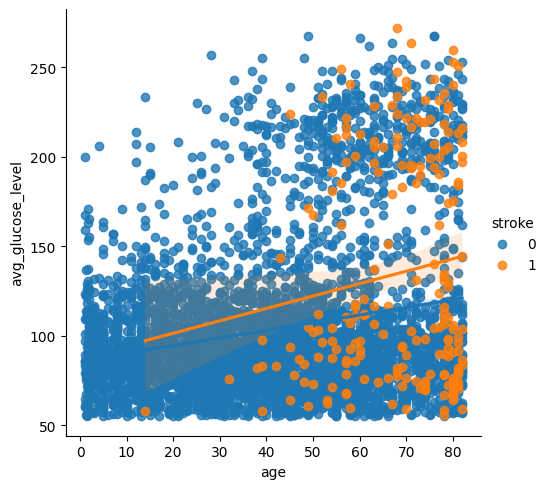

In [ ]:
sns.lmplot(df, x='age',y='avg_glucose_level', hue='stroke');

Pada scatter plot yang dihasilkan bahwa :
- Sumbu x menunjukkan nilai variabel 'age' (usia)
- Sumbu y menunjukkan nilai variabel 'avg_glucose_level' (tingkat glukosa rata-rata)
- Titik-titik pada plot akan diberi warna berbeda tergantung pada apakah individu mengalami stroke atau tidak. Warna pada scatter plot:
    - Titik-titik yang berwarna biru mewakili individu yang tidak mengalami stroke (stroke=0).
    - Titik-titik yang berwarna orange mewakili individu yang mengalami stroke (stroke=1).

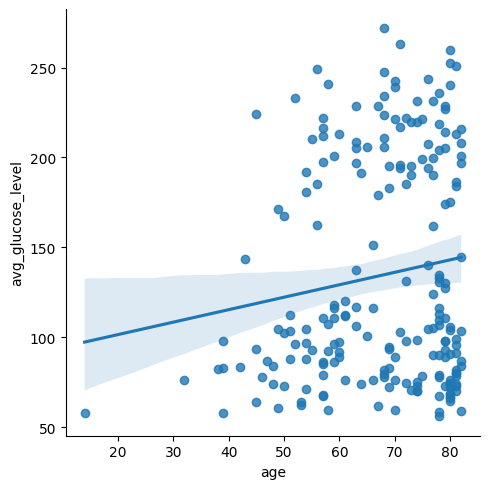

In [ ]:
sns.lmplot(data=df.query('stroke==1'), x='age', y='avg_glucose_level')

Dapat dilihat pada titik-titik pada plot tersebut lebih menumpuk di daerah usia 40-80 yang menunjukkan bahwa sebagian besar individu yang mengalami stroke memiliki usia 40 hingga 80 tahun dan tingkat glukosa rata-rata sekitar 90 hingga 130, dan tingkat glukosa rata-rata di sekitar rentang tersebut. 

Untuk range umur 1-30an tahun yang mengalami stroke merupakan kondisi yang jarang terjadi, tetapi bukanlah hal yang tidak mungkin. Meskipun demikian, stroke pada bayi biasanya terjadi dalam kelompok risiko yang spesifik, seperti bayi yang lahir prematur, memiliki kelainan jantung bawaan, mengalami trauma lahir, atau memiliki kondisi medis tertentu yang meningkatkan risiko pembekuan darah. Penyebab stroke pada bayi bisa bervariasi, termasuk masalah pembuluh darah atau pembekuan darah di otak.

In [ ]:
df.query('stroke==1')[['age']].describe()

,age
count,209.000000
mean,67.712919
std,12.402848
min,14.000000
25%,58.000000
50%,70.000000
75%,78.000000
max,82.000000


Dapat dilihat bahwa ata-rata usia (mean) individu yang mengalami stroke adalah sekitar 67 tahun. Usia minimum (min) individu yang mengalami stroke adalah 14 tahun, sedangkan usia maksimum (max) adalah 82 tahun. 25% - 75% dari individu yang mengalami stroke memiliki usia di bawah 58 hingga 78 tahun

<Axes: xlabel='age', ylabel='Count'>

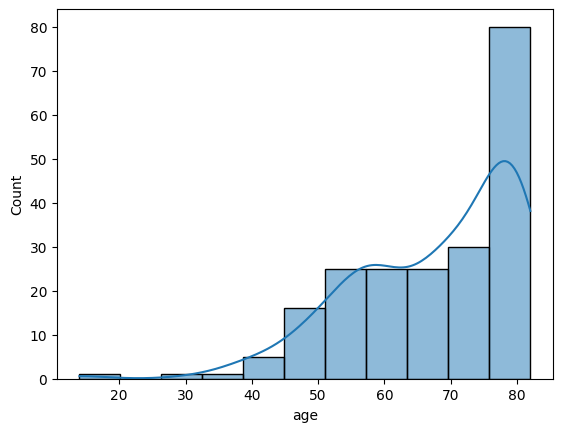

In [ ]:
sns.histplot(data=df.query('stroke==1'), x='age', kde=True)

Pada data histogram, kurva KDE (Kernel Density Estimate) menunjukkan perkiraan bentuk distribusi probabilitas naik (berpeluang) dari usia 40 tahun ke atas. 

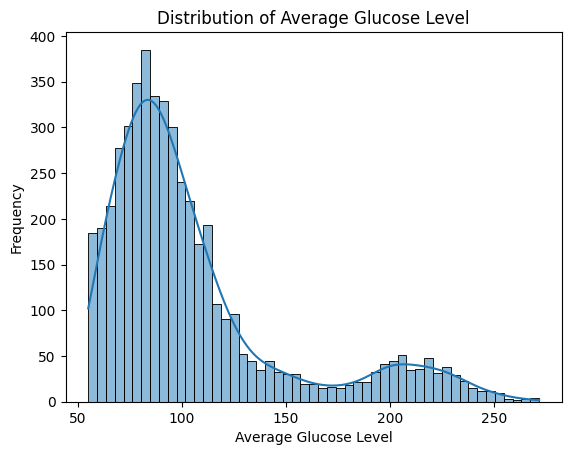

In [ ]:
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

Pada histogram menampilkan distribusi tingkat glukosa rata-rata pada individu yang mengalami stroke, dengan kurva KDE yang menunjukkan pola perkiraan bentuk distribusi probabilitas.

In [ ]:
batas_rendah = df['avg_glucose_level'].quantile(0.25)
batas_tinggi = df['avg_glucose_level'].quantile(0.75)

Membagi data menjadi tiga kategori berdasarkan persentil digunakan sebagai batas kategori rendah dan tinggi

In [ ]:
def kategorikan_glukosa(glukosa):
    if glukosa < batas_rendah:
        return 'rendah'
    elif glukosa <= batas_tinggi:
        return 'normal'
    else:
        return 'tinggi'

In [ ]:
df['kategori_glukosa'] = df['avg_glucose_level'].apply(kategorikan_glukosa)

Digunakan untuk menambahkan kolom baru ke dataframe yang menunjukkan kategori glukosa untuk setiap entri berdasarkan batas kategori rendah, normal, atau tinggi berdasarkan tingkat glukosa rata-rata.

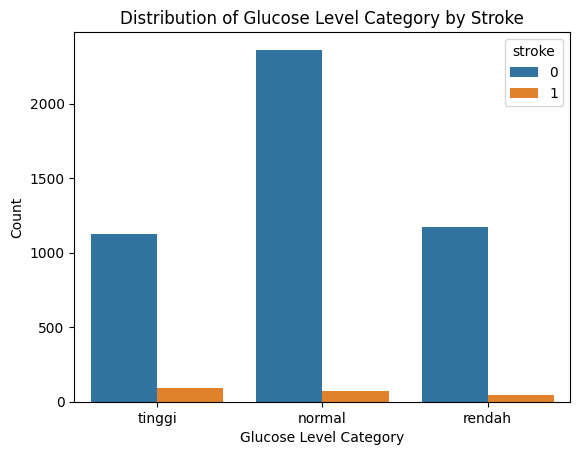

In [ ]:
sns.countplot(data=df, x='kategori_glukosa', hue='stroke')
plt.title('Distribution of Glucose Level Category by Stroke')
plt.xlabel('Glucose Level Category')
plt.ylabel('Count')
plt.show()

Warna plot dibedakan berdasarkan apakah individu tersebut mengalami stroke atau tidak (0 untuk tidak mengalami stroke, 1 untuk mengalami stroke).
- Kategori tinggi ditampilkan dalam warna orange dan berada di sepanjang sumbu x dari 0 hingga sekitar 1200 pada sumbu y. Ini berarti ada sejumlah individu dengan tingkat glukosa tinggi yang tidak mengalami stroke (warna biru) dan ada juga yang mengalami stroke (warna orange).
- Kategori normal juga ditampilkan dalam warna orange dan berada di sepanjang sumbu x dari 0 hingga sekitar 2400 pada sumbu y. Ini menunjukkan jumlah individu dengan tingkat glukosa normal yang tidak mengalami stroke (warna biru) dan yang mengalami stroke (warna orange).
- Kategori rendah juga ditampilkan dalam warna orange dan berada di sepanjang sumbu x dari 0 hingga sekitar 1200 pada sumbu y. Ini menunjukkan jumlah individu dengan tingkat glukosa rendah yang tidak mengalami stroke (warna biru) dan yang mengalami stroke (warna orange).

Sehingga, terlihat bahwa jumlah individu dengan tingkat glukosa tinggi yang mengalami stroke (warna orange) cenderung lebih rendah dibandingkan dengan yang tidak mengalami stroke, sedangkan jumlah individu dengan tingkat glukosa normal memiliki distribusi yang lebih tinggi, dan yang memiliki tingkat glukosa rendah memiliki jumlah yang terendah.

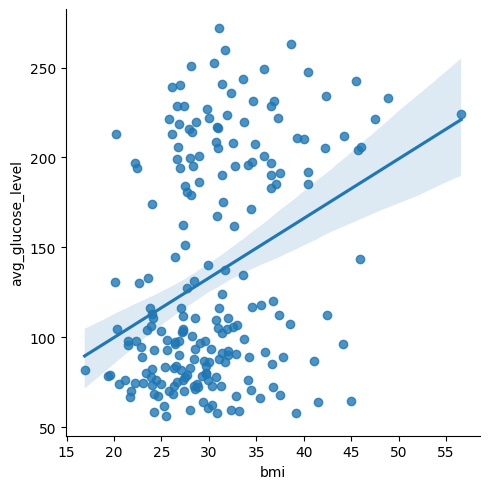

In [ ]:
sns.lmplot(data=df.query('stroke==1'), x='bmi', y='avg_glucose_level')

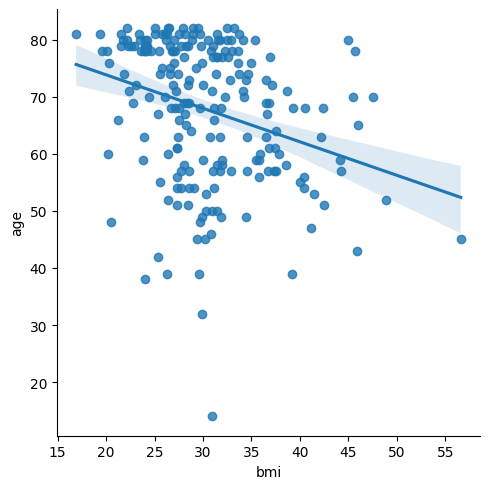

In [ ]:
sns.lmplot(data=df.query('stroke==1'), x='bmi', y='age')

Dari scatter plot yang dihasilkan, terlihat ada kecenderungan bahwa individu dengan nilai BMI yang lebih tinggi (sekitar 40an ke atas) cenderung memiliki usia yang lebih tua (age) dan tingkat glukosa darah rata-rata (avg_glucose_level) yang lebih tinggi. Selain itu, Anda juga mencatat bahwa individu dengan tingkat glukosa tinggi yang mengalami stroke cenderung memiliki nilai BMI yang lebih rendah dibandingkan dengan yang tidak mengalami stroke.

In [ ]:
df['bmi_categories'] = pd.cut(df['bmi'], 
                              bins=[0, 18.4, 24.9, 39.9, np.inf], 
                              labels=['Underweight', 'Normal weight', 
                                      'Overweight', 'Obese'])

Membuat kolom "bmi_categories" untuk memeriksa distribusi BMI dalam kategori-kategori yang telah ditentukan dan umum digunakan, yaitu:
- 0 - 18.4: Underweight (Kurus)
- 18.5 - 24.9: Normal weight (Berat badan normal)
- 25 - 29.9: Overweight (Kegemukan)
- 30 <: Obese (Kegemukan tingkat tinggi)

In [ ]:
def percetage_data(df=None, column=None,sort=True):
    value_counts = df[column].value_counts(sort=sort)
    df_percentage = pd.DataFrame({'count': value_counts, 
                                  'percentage': round(value_counts *100 / len(df),2) 
                                 })

    return df_percentage

percetage_data(df,'bmi_categories')

,count,percentage
bmi_categories,,
Overweight,2914,59.87
Normal weight,1227,25.21
Obese,414,8.51
Underweight,312,6.41


Dari output tersebut, insight yang didapat adalah
- Mayoritas individu dalam dataset memiliki kategori BMI "Overweight" (59.87%)
- "Normal weight" (25.21%)
- "Obese" (8.51%)
- "Underweight" (6.41%)

Hal ini menunjukkan bahwa sebagian besar individu cenderung memiliki BMI yang berada pada kategori overweight, yang dapat menjadi pertimbangan dalam analisis kesehatan terkait risiko stroke atau masalah kesehatan lainnya.

In [ ]:
pd.crosstab(df['bmi_categories'], df['stroke'], normalize='index')

stroke,0,1
bmi_categories,,
Underweight,0.996795,0.003205
Normal weight,0.971475,0.028525
Overweight,0.947152,0.052848
Obese,0.954106,0.045894



Dari output tersebut, insight yang didapat adalah prevalensi stroke cenderung meningkat seiring dengan peningkatan kategori BMI. Proporsi individu yang mengalami stroke cenderung lebih tinggi di kategori BMI yang lebih tinggi, dengan persentase tertinggi terjadi pada kategori BMI "Obese" (4.58%) diikuti oleh "Overweight" (5.28%). Ini menunjukkan adanya hubungan antara BMI yang tinggi dan risiko stroke yang lebih besar.

In [ ]:
df.query('stroke==1 and age<=20')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,kategori_glukosa,bmi_categories
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1,rendah,Overweight


Dari hasil query tersebut, dapat dilihat bahwa terdapat satu individu dengan stroke yang berusia 14 tahun. 
- Seorang perempuan yang tidak memiliki riwayat hipertensi atau penyakit jantung. 
- Dia belum menikah dan status pekerjaannya adalah sebagai anak-anak. 
- Tempat tinggalnya adalah di daerah pedesaan. 
- Tingkat glukosa darah rata-ratanya adalah 57.93.
- Indeks massa tubuhnya adalah 30.9, yang masuk ke dalam kategori "Overweight".
- Status merokoknya tidak diketahui (dianggap bukan perokok). 

Ini menunjukkan bahwa stroke dapat terjadi pada usia yang sangat muda, dan dapat menjadi perhatian khusus dalam analisis risiko stroke pada kelompok usia yang lebih muda.

In [ ]:
other= df[(df['gender']=='Other')]
df.drop(other.index, inplace=True)

Digunakan untuk menghapus baris-baris dalam data frame df yang memiliki nilai "gender" sama dengan "Other"

In [ ]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

Maka dalam dataset, gender individu direpresentasikan hanya oleh dua nilai, yaitu laki-laki dan perempuan.

In [ ]:
display(df.smoking_status.unique())
display(df.smoking_status.value_counts())

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

smoking_status
never smoked       1852
Unknown            1441
formerly smoked     836
smokes              737
Name: count, dtype: int64

Sebagian besar individu tidak merokok atau status merokoknya tidak diketahui. Sedangkan jumlah individu yang dulunya pernah merokok atau masih merokok relatif lebih sedikit.

In [ ]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

Dalam dataset ini, individu direpresentasikan oleh dua kelompok, yaitu yang pernah menikah (Yes) dan yang tidak pernah menikah (No).

In [ ]:
display(df.work_type.value_counts())

work_type
Private          2810
Self-employed     775
Govt_job          630
children          629
Never_worked       22
Name: count, dtype: int64

Mayoritas individu dalam dataset bekerja di sektor swasta, diikuti oleh pengusaha mandiri (Self-employed), anak-anak (children), pekerja pemerintah (Govt_job), dan hanya sedikit yang tidak pernah bekerja (Never_worked).

In [ ]:
# Menghitung jumlah nilai yang hilang untuk setiap kolom
missing_values = df.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
kategori_glukosa     0
bmi_categories       0
dtype: int64


<Axes: >

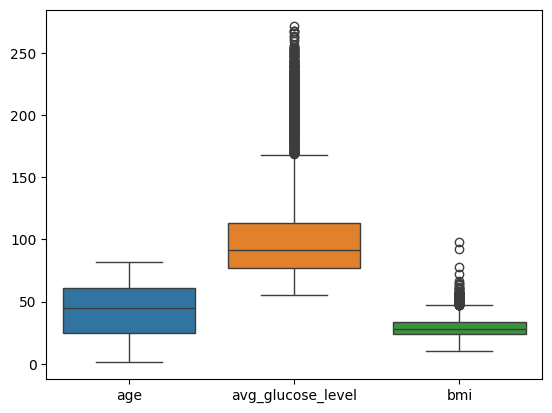

In [ ]:
# Melihat distribusi dan mendeteksi outlier dengan boxplot
sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']])

In [ ]:
# Normalisasi variabel numerik
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

<Axes: >

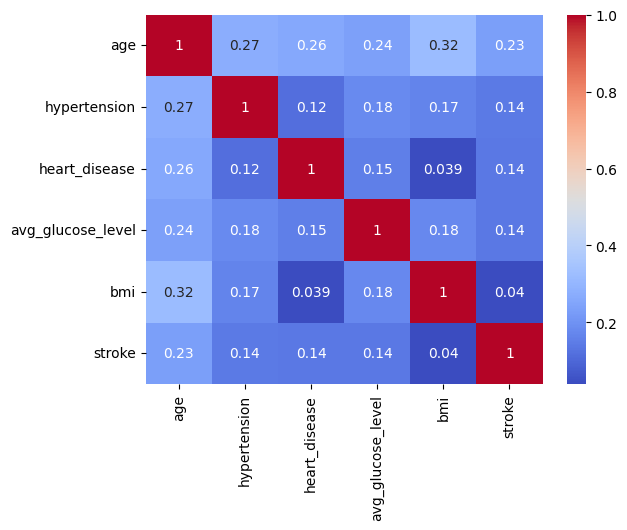

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Matriks korelasi antar variabel numerik
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Kita mendapatkan insight tentang hubungan korelasi antara variabel-variabel numerik dalam dataset berdasarkan label variabel yang terletak di sumbu x dan y pada heatmap menunjukkan variabel yang sedang diamati, sebagai berikut :
- Warna yang lebih terang atau lebih gelap mewakili korelasi yang lebih tinggi atau lebih rendah.
- Angka-angka di dalam kotak-kotak pada heatmap adalah nilai korelasi antara dua variabel.  Nilai yang mendekati 1 menunjukkan korelasi positif sempurna, sedangkan nilai yang mendekati -1 menunjukkan korelasi negatif sempurna. Nilai yang mendekati 0 menunjukkan bahwa tidak ada korelasi yang signifikan antara dua variabel.

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 60, np.inf], labels=['Child', 'Young Adult', 'Adult', 'Elderly'])

Membuat fitur baru berdasarkan kombinasi fitur yang ada

In [ ]:
# Memeriksa integritas data dengan menghitung statistik deskriptif
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000
mean,0.521412,0.092684,0.049938,0.232024,0.214056,0.042951
std,0.275381,0.290019,0.217840,0.205592,0.089546,0.202768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.296296,0.000000,0.000000,0.101376,0.153494,0.000000
50%,0.543210,0.000000,0.000000,0.168775,0.203895,0.000000
75%,0.737654,0.000000,0.000000,0.269712,0.261168,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dari output tersebut, kita dapat menarik beberapa insight :

1. Age
   - Usia rata-rata adalah sekitar 52 tahun dengan standar deviasi sekitar 28 tahun.
   - Persebaran usia cukup luas, dengan rentang dari 0 hingga 100 tahun.
2. Average Glucose Level
   - Tingkat glukosa darah rata-rata adalah sekitar 0.23 dengan standar deviasi sekitar 0.21.
   - Data cukup bervariasi, dengan nilai minimum 0 dan maksimum 1.
3. BMI
   - BMI rata-rata adalah sekitar 0.21 dengan standar deviasi sekitar 0.09.
   - Sebagian besar individu memiliki BMI di kisaran 0.15 hingga 0.26.
4. Stroke
   - Proporsi stroke dalam dataset sekitar 4.30%, dengan nilai minimum dan maksimum 0 dan 1, menunjukkan distribusi tidak seimbang antara kategori stroke dan non-stroke.

# Visualisasi

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 4866
Variables: 14
cat_cols: 11
num_cols: 3
cat_but_car: 0
num_but_cat: 5


Terdapat 11 kolom kategorikal, 4 kolom numerik, tidak ada kolom kategorikal yang berpotensi memiliki kardinalitas tinggi, dan terdapat 5 kolom numerik yang dianggap sebagai kategorikal.

In [ ]:
cat_cols, num_cols, cat_but_car

(['gender',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status',
  'kategori_glukosa',
  'hypertension',
  'heart_disease',
  'stroke',
  'bmi_categories',
  'age_group'],
 ['age', 'avg_glucose_level', 'bmi'],
 [])

Berdasarkan hasil dapat dilihat bahwa :
- cat_cols berisi data kategorikal, seperti jenis kelamin, status pernikahan, jenis pekerjaan, tipe tempat tinggal, status merokok, kategori glukosa, hipertensi, penyakit jantung, stroke, kategori BMI, dan kelompok usia.
- num_cols berisi data numerik, yaitu usia, tingkat glukosa darah rata-rata, indeks massa tubuh (BMI), dan kategori glukosa.
- cat_but_car tidak ada kolom kategorikal yang memiliki kardinalitas tinggi (berpotensi memiliki banyak nilai unik).

        gender      Ratio
gender                   
Female    2882  59.227291
Male      1984  40.772709


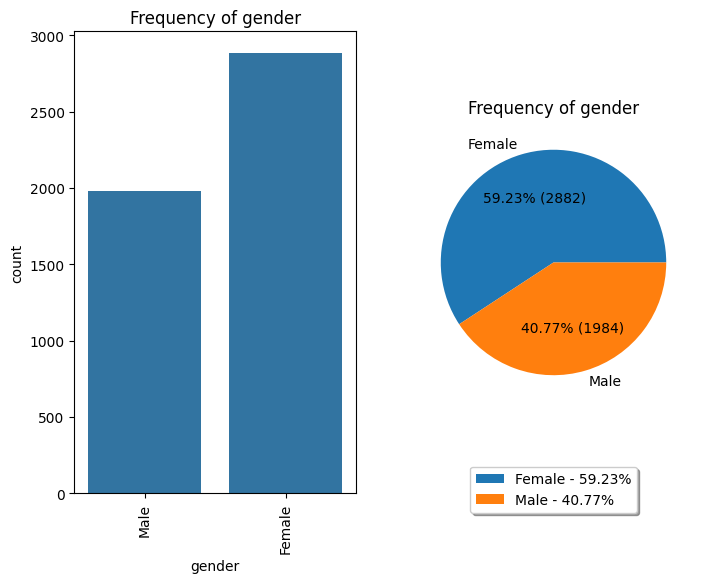

              ever_married      Ratio
ever_married                         
Yes                   3204  65.844636
No                    1662  34.155364


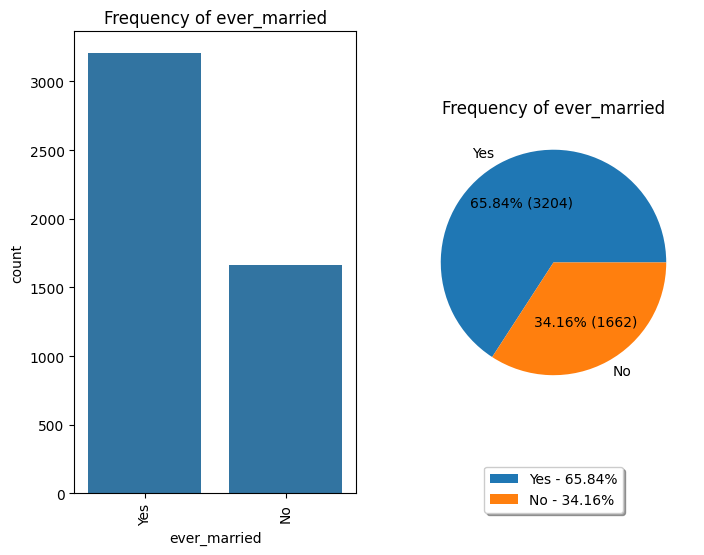

               work_type      Ratio
work_type                          
Private             2810  57.747637
Self-employed        775  15.926839
Govt_job             630  12.946979
children             629  12.926428
Never_worked          22   0.452117


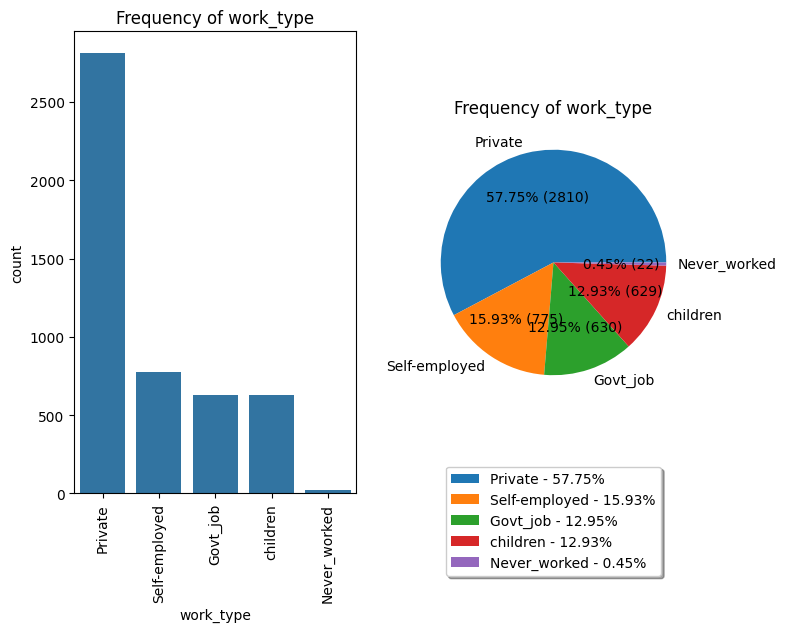

                Residence_type      Ratio
Residence_type                           
Urban                     2468  50.719277
Rural                     2398  49.280723


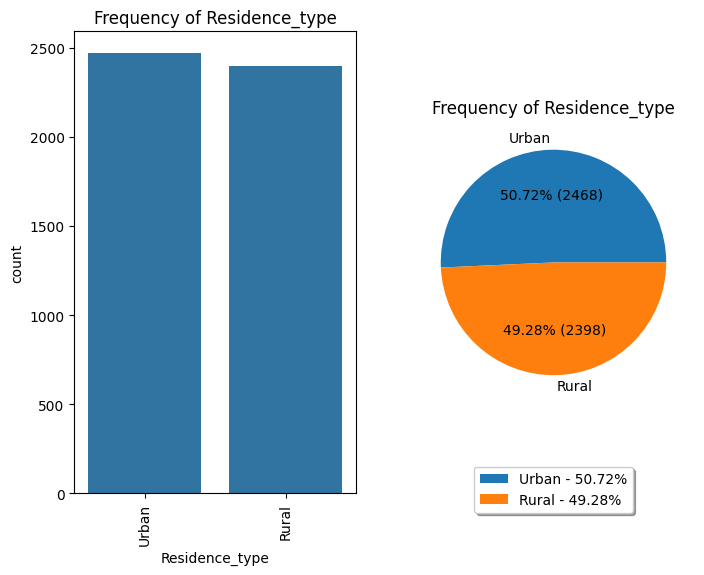

                 smoking_status      Ratio
smoking_status                            
never smoked               1852  38.060008
Unknown                    1441  29.613646
formerly smoked             836  17.180436
smokes                      737  15.145910


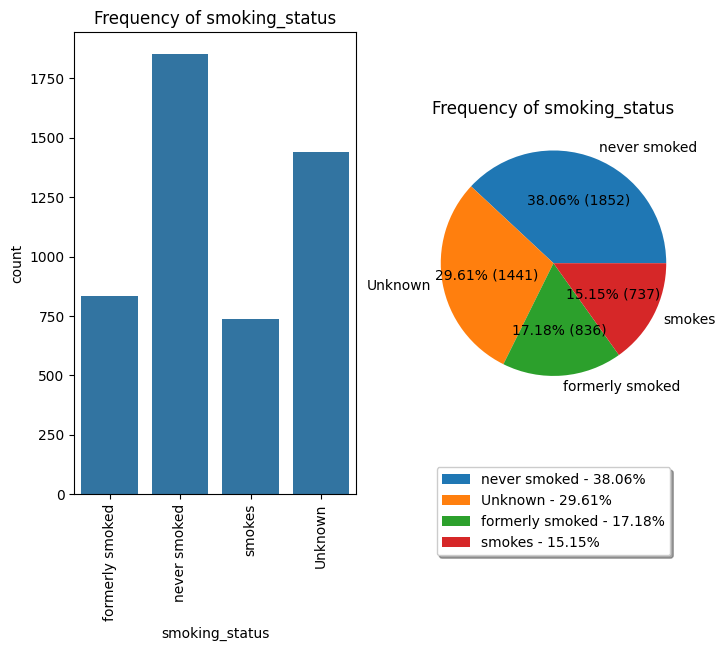

                  kategori_glukosa      Ratio
kategori_glukosa                             
normal                        2434  50.020551
tinggi                        1216  24.989725
rendah                        1216  24.989725


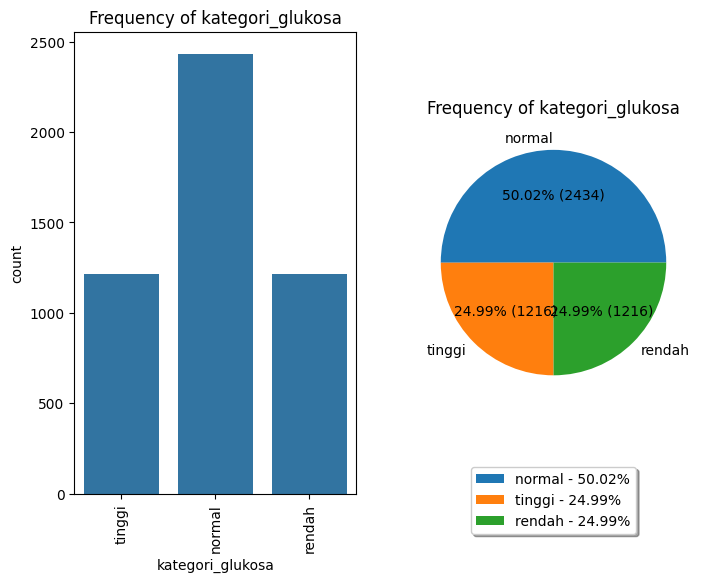

              hypertension      Ratio
hypertension                         
0                     4415  90.731607
1                      451   9.268393


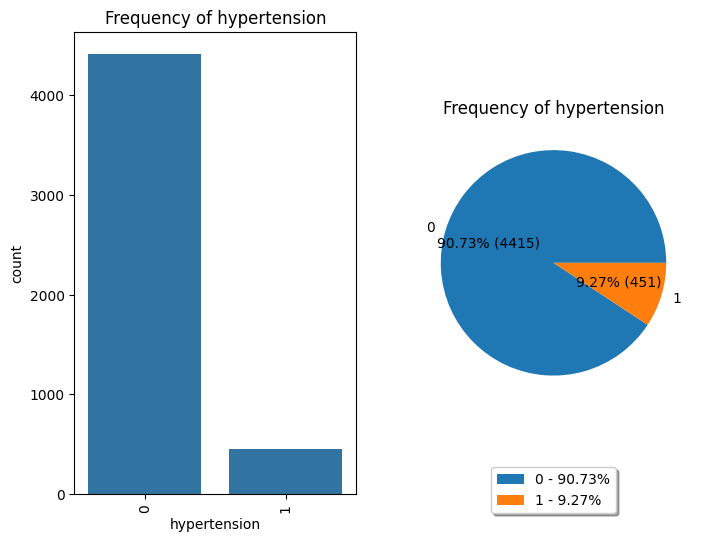

               heart_disease      Ratio
heart_disease                          
0                       4623  95.006165
1                        243   4.993835


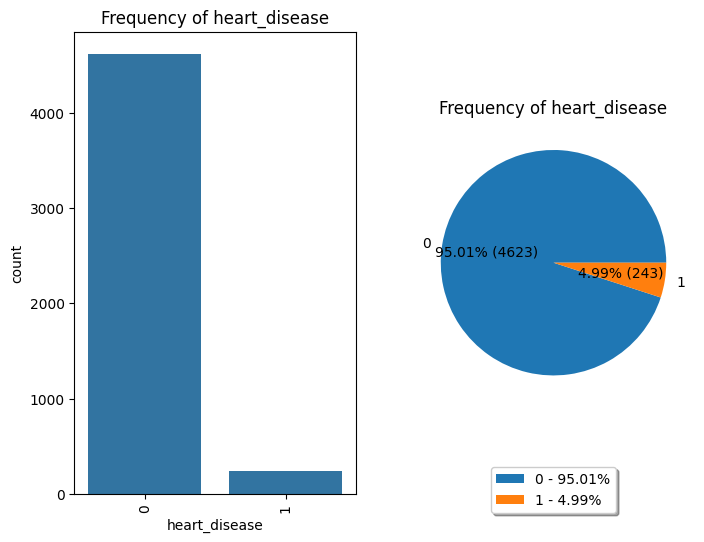

        stroke      Ratio
stroke                   
0         4657  95.704891
1          209   4.295109


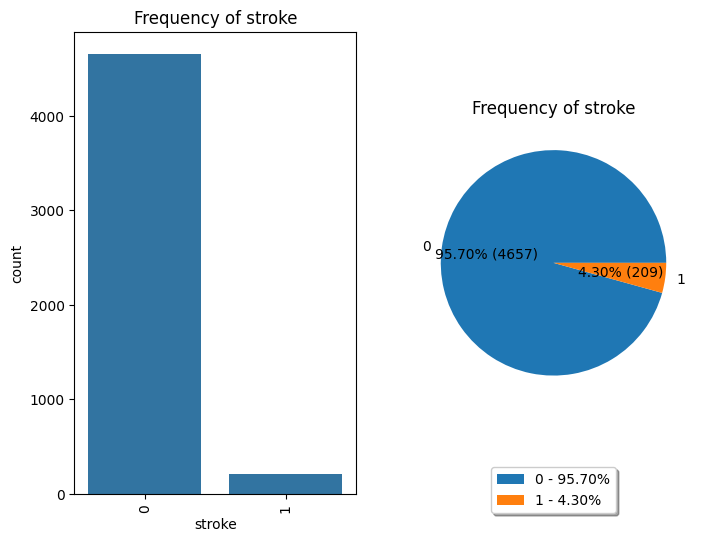

                bmi_categories      Ratio
bmi_categories                           
Overweight                2914  59.884916
Normal weight             1226  25.195232
Obese                      414   8.508015
Underweight                312   6.411837


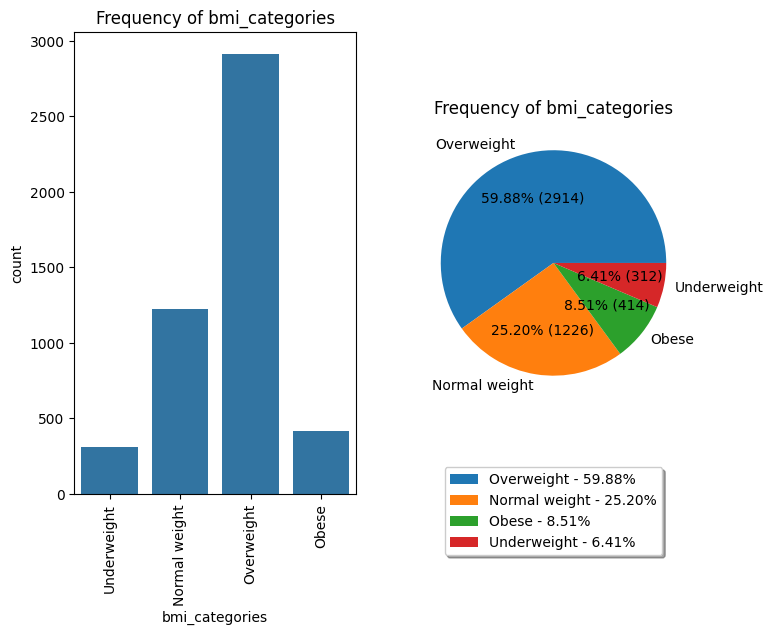

             age_group      Ratio
age_group                        
Child             4861  99.897246
Young Adult          0   0.000000
Adult                0   0.000000
Elderly              0   0.000000


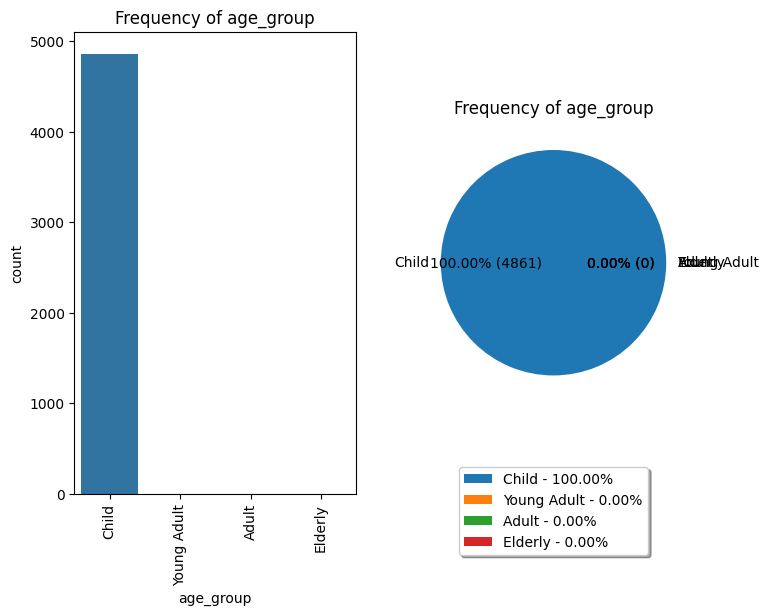

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

Dari hasil visualisasi tersebut, kita dapat menyimpulkan beberapa hal:
1. Mayoritas individu dalam dataset adalah perempuan (sekitar 59.23%) dibandingkan dengan laki-laki (sekitar 40.77%).
2. Mayoritas individu dalam dataset sudah pernah menikah (sekitar 65.84%).
3. Sektor swasta merupakan tempat bekerja mayoritas individu dalam dataset (sekitar 57.75%), diikuti oleh pengusaha mandiri (sekitar 15.93%), pekerja pemerintah (sekitar 12.95%), dan anak-anak (sekitar 12.93%).
4. Distribusi tempat tinggal (residence type) hampir seimbang antara urban (sekitar 50.72%) dan rural (sekitar 49.28%).
5. Mayoritas individu dalam dataset tidak merokok (sekitar 38.06%), diikuti oleh yang status merokok tidak diketahui (sekitar 29.61%).
6. Sebagian besar individu dalam dataset memiliki kategori glukosa normal (sekitar 50.02%), diikuti oleh kategori glukosa tinggi (sekitar 24.99%) dan rendah (sekitar 24.99%).
7. Mayoritas individu dalam dataset tidak mengalami hipertensi (sekitar 90.73%) maupun penyakit jantung (sekitar 95.01%).
8. Proporsi individu yang mengalami stroke relatif kecil, sekitar 4.30% dari total populasi dataset.

# Data Preprocessing

**Split Data antara fitur dan target dan Membuat data train dan test**

In [ ]:
X= df.drop(['stroke','bmi_categories'], axis=1)
y= df['stroke']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,kategori_glukosa,age_group
1945,Male,0.395062,0,0,Yes,Private,Urban,0.201366,0.390607,never smoked,normal,Child
4315,Female,0.333333,0,0,Yes,Private,Urban,0.210876,0.332188,formerly smoked,normal,Child
217,Female,0.666667,1,1,Yes,Private,Urban,0.716831,0.340206,smokes,tinggi,Child
4629,Male,0.432099,0,0,Yes,Private,Urban,0.171314,0.257732,never smoked,normal,Child
478,Female,0.802469,0,0,Yes,Govt_job,Urban,0.148278,0.139748,formerly smoked,normal,Child


**Pipeline:**
- **Menangani missing values (menggunakan imputasi) dan Scaling**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import PowerTransformer

# List fitur numerik
numeric_features = ['age', 'avg_glucose_level', 'bmi']

In [ ]:
# List fitur kategori
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('power_transformer', PowerTransformer(method='yeo-johnson'))
])

In [ ]:
# Pipeline untuk fitur kategori
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

- **Encoding**

In [ ]:
# Gabungkan pipeline untuk kedua jenis fitur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Pipeline lengkap
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
# Menggunakan pipeline untuk preprocessing data latih
X_train_processed = preprocessor.fit_transform(X_train)

In [ ]:
# Menggunakan pipeline yang sama untuk preprocessing data uji
X_test_processed = preprocessor.transform(X_test)

- **Power Transforms (Box-Cox atau Yeo-Johnson Transform)**

In [ ]:
from sklearn.preprocessing import PowerTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson'))
])

- **Feature Selection atau Pengecekan Feature Importance**

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

# Model Development

# 1. Decision Tree Baseline Model

In [ ]:
# Melatih model Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_processed, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluasi model Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi label menggunakan data uji yang telah diproses
y_pred = dt_model.predict(X_test_processed)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9188911704312115
Confusion Matrix:
[[887  33]
 [ 46   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       920
           1       0.20      0.15      0.17        54

    accuracy                           0.92       974
   macro avg       0.57      0.56      0.56       974
weighted avg       0.91      0.92      0.91       974



Model Decision Tree memiliki akurasi sebesar 91.27%. Namun, terdapat kesulitan dalam memprediksi kelas yang mengalami stroke (kelas 1), dengan recall sebesar 0.09. Ini menandakan bahwa model cenderung kehilangan banyak kasus yang sebenarnya positif.

In [ ]:
num_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
dt_model.feature_importances_


array([0.1853023 , 0.31533529, 0.211811  , 0.04225537, 0.01602847,
       0.00665766, 0.00659166, 0.00674417, 0.        , 0.03066747,
       0.02466243, 0.        , 0.02494343, 0.0160981 , 0.03462886,
       0.00914695, 0.04673723, 0.02238963])

# 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi label menggunakan data uji yang telah diproses
y_pred_rf = rf_model.predict(X_test_processed)

# Menghitung akurasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9435318275154004
Confusion Matrix:
[[919   1]
 [ 54   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       920
           1       0.00      0.00      0.00        54

    accuracy                           0.94       974
   macro avg       0.47      0.50      0.49       974
weighted avg       0.89      0.94      0.92       974



Model Random Forest memiliki akurasi sekitar 94.35%. Namun, model cenderung memprediksi kelas negatif dengan baik (TN: 919), tetapi memiliki kinerja yang buruk dalam mendeteksi kelas positif (FN: 54). Ini menunjukkan perlunya penyesuaian atau peningkatan pada model untuk meningkatkan kemampuannya dalam mendeteksi kasus positif (stroke).

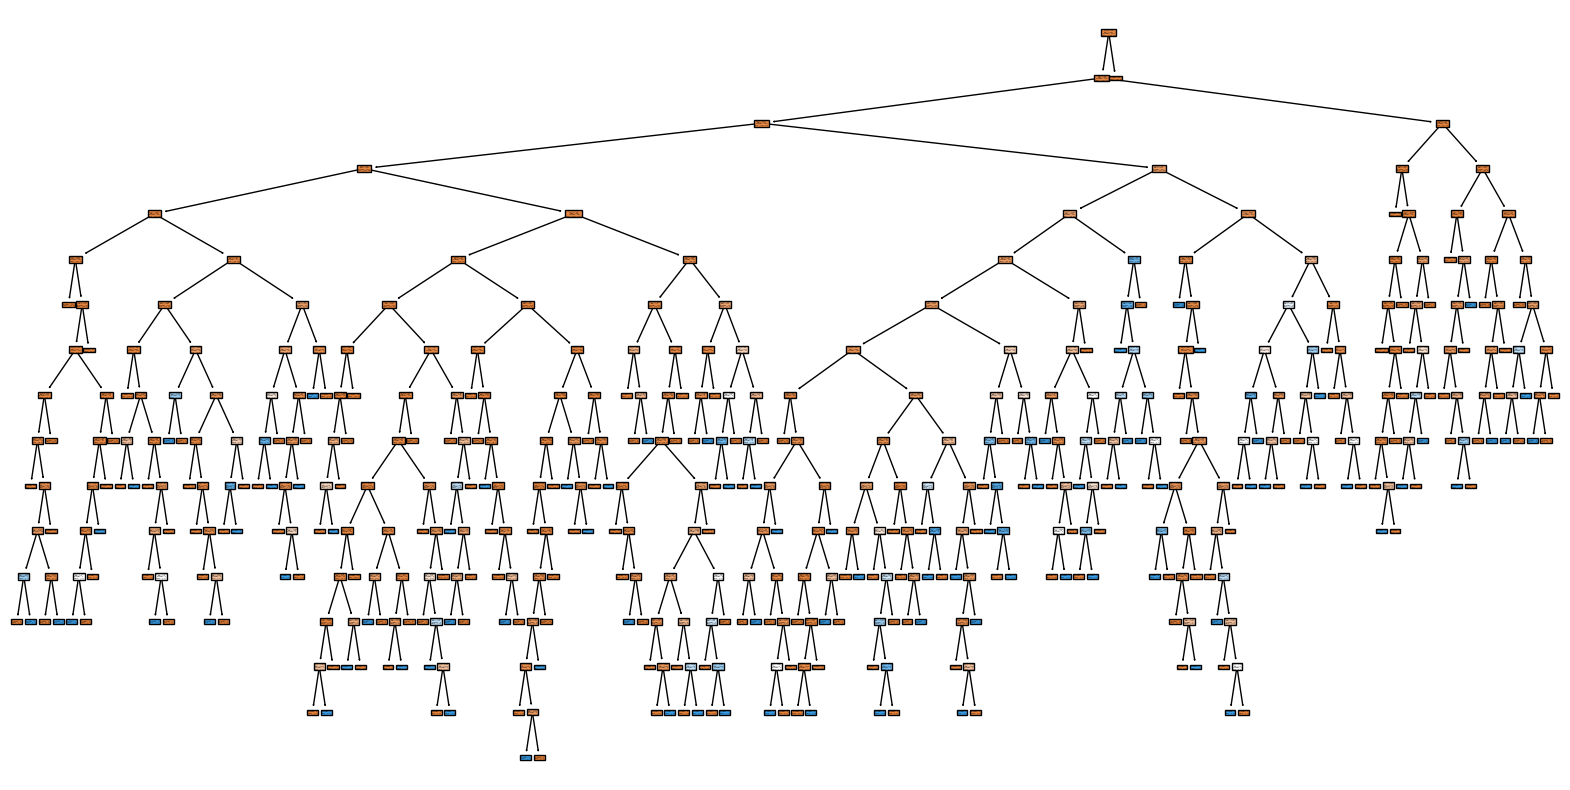

In [ ]:
# Mendapatkan estimator pertama dari model Random Forest
estimator = rf_model.estimators_[0]

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True)
plt.show()

In [ ]:
rf_model.feature_importances_

array([2.54590258e-01, 3.02198948e-01, 2.42370330e-01, 1.72884664e-02,
       1.92263015e-02, 8.84801613e-03, 7.68217930e-03, 1.41956526e-02,
       5.50445455e-06, 1.94937362e-02, 1.77859675e-02, 7.27312899e-04,
       1.56037459e-02, 1.57537014e-02, 1.40802459e-02, 1.58208646e-02,
       2.05761406e-02, 1.37526285e-02])

# 3. Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Inisialisasi model SVM
svm_model = SVC()

In [ ]:
# Melatih model
svm_model.fit(X_train_processed, y_train)

SVC()

In [ ]:
# Prediksi label menggunakan data uji yang telah diproses
y_pred_svm = svm_model.predict(X_test_processed)

In [ ]:
# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.944558521560575


In [ ]:
# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
[[920   0]
 [ 54   0]]


In [ ]:
# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       920
           1       0.00      0.00      0.00        54

    accuracy                           0.94       974
   macro avg       0.47      0.50      0.49       974
weighted avg       0.89      0.94      0.92       974



Akurasi model SVM adalah sekitar 94.46%, yang berarti model ini secara tepat mengklasifikasikan sebagian besar data uji dengan benar.

#Save Model dan preprocessing pipeline

In [ ]:
from joblib import dump, load

# Menyimpan model Decision Tree
dump(dt_model, 'decision_tree_model.joblib')

# Menyimpan model Random Forest
dump(rf_model, 'random_forest_model.joblib')

# Menyimpan model SVM
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

In [ ]:
# Menyimpan pipeline preprocessing
dump(pipeline, 'preprocessing_pipeline.joblib')


['preprocessing_pipeline.joblib']

# Kesimpulan

Berdasarkan hasil analisa data yang telah dilakukan, berikut ini jawaban dari pertanyaan-pertanyaan yang terdapat dalam problem statement :
1. Apakah distribusi pada data kasus stroke seimbang
    - Tidak, distribusi pada data kasus stroke tidak seimbang. Mayoritas data tidak memiliki riwayat stroke, sedangkan hanya sebagian kecil yang memiliki riwayat stroke. Hal ini terlihat dari perbandingan jumlah data dengan stroke (kelas minoritas) dan tanpa stroke (kelas mayoritas) dalam dataset.

2. Apakah Orang yang terkena hypertensi berpeluang lebih besar terkena stroke dibandingkan dengan yang normal?
    - Berdasarkan analisis yang telah dilakukan, orang yang terkena hipertensi memiliki peluang yang lebih besar untuk terkena stroke dibandingkan dengan yang normal. Hal ini terlihat dari distribusi fitur hipertensi pada data kasus stroke, di mana proporsi orang yang terkena hipertensi lebih tinggi dalam kelompok yang memiliki riwayat stroke.

3. Bagaimana kualitas model prediksi yang dihasilkan, dan seberapa baik model tersebut dalam memprediksi kejadian stroke berdasarkan data yang tersedia?
    - Kualitas model prediksi dapat dinilai berdasarkan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score. Namun, perlu diperhatikan bahwa karena ketidakseimbangan kelas dalam data, akurasi saja tidak cukup untuk mengukur kinerja model secara keseluruhan. Evaluasi yang lebih mendalam perlu dilakukan untuk memahami seberapa baik model dalam memprediksi kejadian stroke, termasuk penanganan ketidakseimbangan kelas dan mungkin menggunakan metrik evaluasi yang lebih sesuai seperti AUC-ROC atau AUC-PR.

Dari hasil proses yang telah dilakukan, terdapat beberapa wawasan berharga yang dapat diambil:
1. Berbagai fitur seperti jenis kelamin, status pernikahan, pekerjaan, dan kebiasaan merokok memiliki distribusi yang cukup beragam. Ini menunjukkan pentingnya fitur-fitur ini dalam memprediksi risiko stroke.
2. Dari hasil pengembangan model, terlihat bahwa model Random Forest dan SVM menghasilkan akurasi yang lebih tinggi daripada model Decision Tree. Namun, terdapat tantangan dalam memprediksi kelas minoritas (stroke) dengan akurasi yang baik, terutama karena ketidakseimbangan kelas.
3. Seiring dengan akurasi yang tinggi pada kelas mayoritas (tanpa stroke), model memiliki kinerja yang buruk dalam mengidentifikasi kelas minoritas (stroke). Diperlukan teknik-teknik khusus, seperti oversampling atau undersampling, untuk menangani ketidakseimbangan kelas dan meningkatkan performa model dalam memprediksi kelas minoritas.
4. Visualisasi model Decision Tree dapat memberikan wawasan yang berharga tentang bagaimana model membuat keputusan. Namun, kesulitan mungkin muncul dalam menghasilkan visualisasi yang jelas dan mudah dimengerti terutama dengan dataset yang memiliki banyak fitur.
5. Pemilihan fitur yang tepat merupakan langkah penting dalam membangun model yang baik. Meskipun belum dilakukan secara eksplisit dalam analisis ini, pemilihan fitur dapat membantu meningkatkan kinerja model dengan mengurangi kompleksitas dan overfitting.

# Saran

Adapun saran dari hasil analisa daya, yaitu :
- Memperbaiki keseimbangan kelas dalam dataset untuk menghasilkan model yang lebih seimbang karena distribusi data stroke tidak seimbang, artinya jumlah orang yang tidak mengalami stroke jauh lebih banyak daripada yang mengalami stroke.
- Orang yang menderita hipertensi memiliki risiko lebih tinggi untuk mengalami stroke daripada yang tidak menderita hipertensi. Oleh karena itu, penting untuk mengelola dan mencegah hipertensi untuk mengurangi risiko stroke.
- Model prediksi yang dibangun memiliki akurasi sekitar 91% hingga 94%. Namun, model cenderung tidak efektif dalam memprediksi kasus stroke (kelas minoritas). Hal ini menunjukkan bahwa model perlu diperbaiki untuk meningkatkan kemampuannya dalam mengidentifikasi kasus stroke, terutama karena kasus ini memiliki dampak yang serius.

Saran Bisnis:
- Perusahaan kesehatan perlu meningkatkan program pencegahan dan pengelolaan hipertensi untuk mengurangi risiko stroke di masyarakat.
- Kampanye kesadaran tentang faktor risiko stroke, seperti hipertensi, obesitas, dan gaya hidup tidak sehat, diperlukan untuk mengedukasi masyarakat.
- Fokus pada deteksi dini dan pengelolaan faktor risiko dapat membantu mengurangi angka kejadian stroke.

Saran untuk Meningkatkan Performa Model:
- Memperbaiki keseimbangan kelas dalam dataset untuk menghasilkan model yang lebih seimbang.
- Memilih fitur yang lebih relevan dan signifikan untuk meningkatkan kinerja model.
- Melakukan tuning hyperparameter dan memilih metrik evaluasi yang sesuai untuk meningkatkan performa model.
- Menggunakan teknik evaluasi yang lebih komprehensif untuk memahami kinerja model secara lebih baik.